In [215]:
from datascience import *
import omdb
from time import sleep
from jwp.jwcache import *
import numpy as np
import scipy
import pickle

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [19]:
master_table = Table().read_table('master.csv', encoding='macroman')
cache = load_cache('imdb cache.json')

In [5]:
master_table

imdb_id,title,script_id,total_lines,female_lines,female_percent
tt0147800,10 things i hate about you,1,746,345,0.462
tt0103594,1492: conquest of paradise,2,333,37,0.111
tt0179626,15 minutes,3,818,260,0.318
tt0062622,2001: a space odyssey,4,142,8,0.056
tt0083511,48 hrs.,5,733,393,0.536
tt0119116,the fifth element,6,436,48,0.11
tt0134273,8mm,7,782,98,0.125
tt0095742,a nightmare on elm street 4: the dream master,8,179,112,0.626
tt0097981,a nightmare on elm street: the dream child,9,237,171,0.722
tt0118564,affliction,11,789,142,0.18


In [10]:
# imdb_responses = []
# for imdb_id in master_table.column('imdb_id'):
#     imdb_responses.append(omdb.imdbid(imdb_id, tomatoes=True))

In [13]:
# imdb_responses[-1]

Item({'tomato_consensus': "Gut-wrenching and emotionally affecting, Lee Daniels' The Butler overcomes an uneven narrative thanks to strong performances from an all-star cast.", 'title': "Lee Daniels' The Butler", 'tomato_image': 'fresh', 'genre': 'Biography, Drama', 'box_office': '$116.6M', 'runtime': '132 min', 'tomato_reviews': '173', 'awards': 'Nominated for 2 BAFTA Film Awards. Another 17 wins & 50 nominations.', 'tomato_user_meter': '78', 'tomato_user_reviews': '78903', 'tomato_fresh': '123', 'website': 'http://www.weinsteinco.com/leedanielsthebutler', 'response': 'True', 'production': 'The Weinstein Company', 'metascore': '66', 'poster': 'http://ia.media-imdb.com/images/M/MV5BMjM2NDY3MjkyMF5BMl5BanBnXkFtZTcwMDM5Nzg5OQ@@._V1_SX300.jpg', 'imdb_id': 'tt1327773', 'tomato_meter': '71', 'writer': 'Danny Strong, Wil Haygood (article)', 'imdb_rating': '7.2', 'director': 'Lee Daniels', 'language': 'English', 'tomato_rotten': '50', 'year': '2013', 'imdb_votes': '85,827', 'type': 'movie', '

In [15]:
# cache = {}
# for x in range(len(imdb_responses)):
#     response = imdb_responses[x]
#     iid = response['imdb_id']
#     temp = {iid: response}
#     cache.update(temp)

In [18]:
# write_cache('imdb cache.json', cache)

In [22]:
with_imdb_ratings = master_table.with_columns(['IMDB rating', [response['imdb_rating'] for response in imdb_responses], '# IMDB Votes', [response['imdb_votes'] for response in imdb_responses]])

In [23]:
with_imdb_ratings

imdb_id,title,script_id,total_lines,female_lines,female_percent,IMDB Rating,# IMDB Votes
tt0147800,10 things i hate about you,1,746,345,0.462,7.2,"217,308"
tt0103594,1492: conquest of paradise,2,333,37,0.111,6.5,"22,181"
tt0179626,15 minutes,3,818,260,0.318,6.1,"42,080"
tt0062622,2001: a space odyssey,4,142,8,0.056,8.3,"416,775"
tt0083511,48 hrs.,5,733,393,0.536,6.9,"51,904"
tt0119116,the fifth element,6,436,48,0.11,7.7,"335,119"
tt0134273,8mm,7,782,98,0.125,6.5,"103,503"
tt0095742,a nightmare on elm street 4: the dream master,8,179,112,0.626,5.6,"35,234"
tt0097981,a nightmare on elm street: the dream child,9,237,171,0.722,5.1,"28,972"
tt0118564,affliction,11,789,142,0.18,7.0,"11,752"


In [48]:
tomato_user_meters = [response['tomato_user_meter'] for response in imdb_responses]
tomato_meters = [response['tomato_meter'] for response in imdb_responses]
tomato_ratings = [response['tomato_rating'] for response in imdb_responses]
tomato_user_ratings = [response['tomato_user_rating'] for response in imdb_responses]
tomato_reviews = [response['tomato_reviews'] for response in imdb_responses]
tomato_fresh_reviews = [response['tomato_fresh'] for response in imdb_responses]

# interestingly, OMDb API does not include # of user ratings in API call

In [31]:
with_tomatoes = with_imdb_ratings.with_columns(['Tomato meter', tomato_meters, '# tomato reviews', tomato_reviews, 'Tomato fresh', tomato_fresh_reviews, 'Tomato rating', tomato_ratings,'Tomato user meter', tomato_user_meters, 'Tomato user ratings', tomato_user_ratings])

In [113]:
with_tomatoes.sort('female_percent', descending=True)

imdb_id,title,script_id,total_lines,female_lines,female_percent,IMDB Rating,# IMDB Votes,Tomato meter,# tomato reviews,Tomato fresh,Tomato rating,Tomato user meter,Tomato user ratings
tt0929632,Precious,1243,446,446,1,7.4,"85,444",91,221,202,7.8,81,3.6
tt0435625,The Descent,7695,602,599,0.995,7.2,"150,697",85,171,145,7.3,75,3.4
tt1663655,Martyrs (2015) [2009-12-3] [Digital],8614,418,407,0.974,3.9,"2,014",N/A,N/A,N/A,N/A,N/A,N/A
tt1969062,Infinitely Polar Bear,5420,1577,1522,0.965,7.0,"7,806",79,105,83,6.7,72,3.7
tt0414387,Pride and Prejudice,3133,1295,1247,0.963,7.8,"189,157",85,171,146,7.7,89,3.8
tt0092809,the curse,315,712,686,0.963,4.9,"1,383",N/A,N/A,N/A,N/A,28,2.8
tt2431286,Philomena,5457,1426,1338,0.938,7.6,"74,129",92,173,160,7.9,89,4.1
tt0185937,The Blair Witch Project,5531,673,626,0.93,6.4,"182,793",86,155,134,7.7,55,2.6
tt1454029,The Help,2530,3367,3109,0.923,8.1,"311,598",75,204,154,7.0,89,4.2
tt0157503,drop dead gorgeous,52,366,338,0.923,6.5,"26,968",44,66,29,5.3,75,3.1


In [100]:
with_tomatoes_cleaned = with_tomatoes.where('IMDB Rating', are.not_equal_to('N/A'))
with_tomatoes_cleaned = with_tomatoes_cleaned.with_column('IMDB Rating', with_tomatoes_cleaned.column('IMDB Rating').astype(float))

In [203]:
def percent_bin(percent_col, percent=.05):
    return np.round(percent_col/percent) * percent


In [204]:
binz = percent_bin(with_tomatoes_cleaned.column('female_percent'), percent=.1)

In [205]:
binned_percents = with_tomatoes_cleaned.with_column('binned percent', binz)

binned percent,count
0,149
0.1,308
0.2,313
0.3,295
0.4,202
0.5,162
0.6,122
0.7,61
0.8,44
0.9,21


female_percent,binned percent,IMDB Rating
0.462,0.5,7.2
0.111,0.1,6.5
0.318,0.3,6.1
0.056,0.1,8.3
0.536,0.5,6.9
0.11,0.1,7.7
0.125,0.1,6.5
0.626,0.6,5.6
0.722,0.7,5.1
0.18,0.2,7


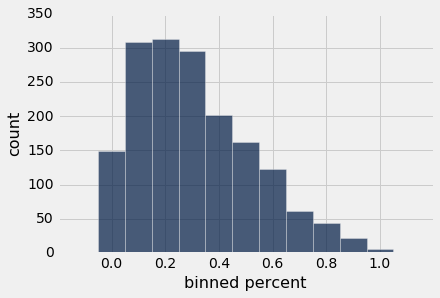

In [206]:
select_cols = binned_percents.select(['female_percent', 'binned percent', 'IMDB Rating'])
imdb_hist_table = select_cols.group('binned percent', np.mean)
counts = select_cols.group('binned percent')
counts.bar('binned percent', 'count')
counts.show()
select_cols.show()

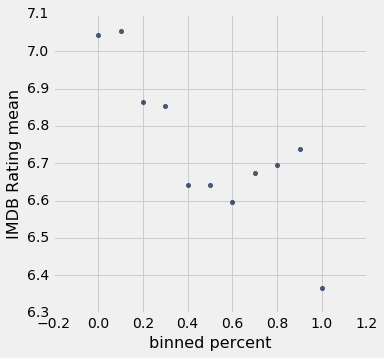

In [207]:
avgs = imdb_hist_table.column('IMDB Rating mean')
imdb_hist_table.scatter('binned percent', 'IMDB Rating mean')


In [242]:
select_cols = select_cols.with_column('binned percent', select_cols.column('binned percent').astype(float))
no_womyn = select_cols.where('binned percent', are.below_or_equal_to(.4)).column('IMDB Rating')
majority_womyn = select_cols.where('binned percent', are.above_or_equal_to(.6)).column('IMDB Rating')

In [243]:
scipy.stats.ttest_ind(no_womyn, majority_womyn, equal_var=False)

Ttest_indResult(statistic=3.6981432853895448, pvalue=0.00025099267816818942)

In [244]:
np.var(no_womyn)

1.0000459481127699

In [245]:
np.var(majority_womyn)

1.007006169012338